In [1]:
import sklearn.model_selection
dir(sklearn.model_selection)

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LearningCurveDisplay',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedGroupKFold',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 'ValidationCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_plot',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'typing',
 'validation_curve']

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [5]:
df=pd.read_csv('zoo.csv')
df.shape
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
animal_names=df['animal_name'].tolist()
print(animal_names)
df=df.drop('animal_name',axis = 1)
df

['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck', 'elephant', 'flamingo', 'flea', 'frog', 'frog', 'fruitbat', 'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vampire', 'vole', 'vulture', 'wallaby', 'wasp', 'wolf', 'worm', 'wren']


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
#train_test_split??

In [8]:
from sklearn.model_selection import train_test_split
dir(train_test_split)
#help(train_test_split)

X=df.loc[:,df.columns!= 'class_type']
y=df['class_type']

#if we stratify=X, will get below error:
#ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
print(y_test.describe(),y_train.describe())



count    31.000000
mean      2.741935
std       2.081149
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       7.000000
Name: class_type, dtype: float64 count    70.000000
mean      2.871429
std       2.125903
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       7.000000
Name: class_type, dtype: float64


In [7]:
#help(train_test_split)
model = DecisionTreeClassifier()
type(model)

sklearn.tree._classes.DecisionTreeClassifier

In [8]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_predict=model.predict(X_test)

In [10]:
feature_names=list(df.columns.values)
print(feature_names)
feature_names=feature_names[:-1]
feature_names

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize']

In [11]:
class_int=df['class_type'].unique().tolist()
class_int
class_names = ['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']
dictionary=dict(zip(class_int,class_names))
dictionary

{1: 'Mammal',
 4: 'Fish',
 2: 'Bird',
 7: 'Invertebrate',
 6: 'Bug',
 5: 'Amphibian',
 3: 'Reptile'}

In [2]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [17]:
export_graphviz??

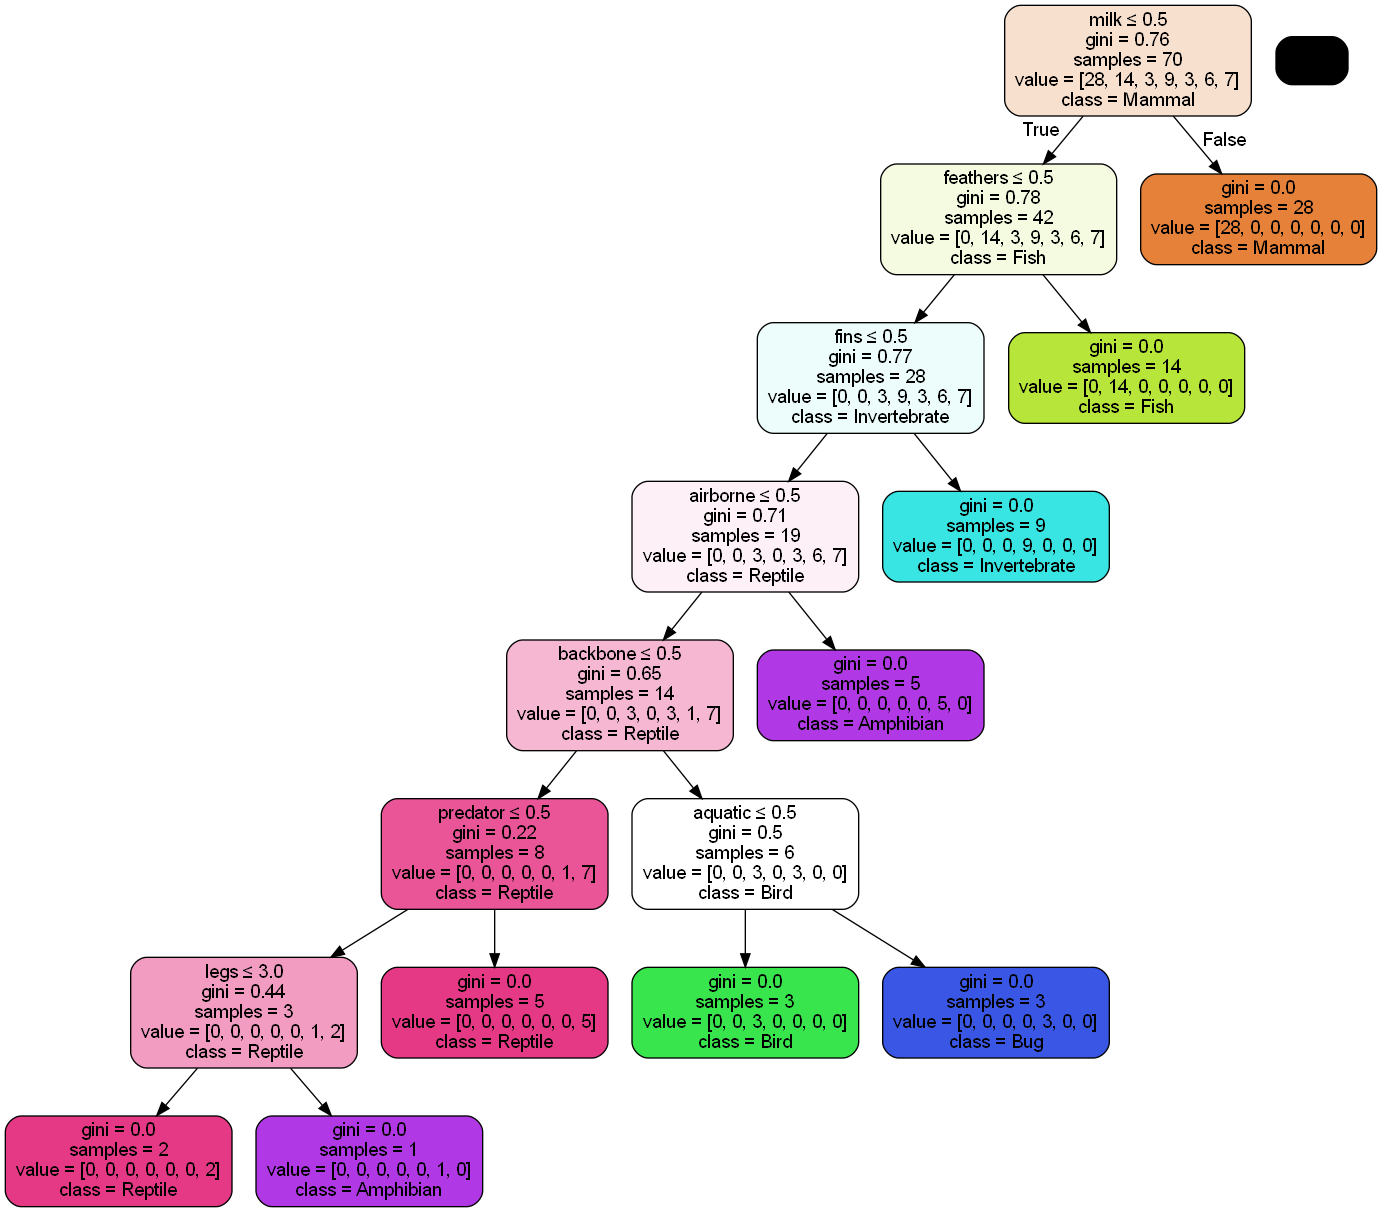

In [18]:
dot_data=StringIO()

export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [3]:
dot_data=StringIO()
dot_data.getvalue()

''